In [86]:
from ephys_queries import select_waveforms, db_setup_core
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import dotenv

In [43]:
dotenv.load_dotenv()
engine, metadata = db_setup_core()
exp_names = ["OPTO"]

In [67]:
neuron_to_play_idx = 78

In [68]:
res = select_waveforms(engine, metadata, exp_names=exp_names)
neuron_ids = res.neuron_id.unique()

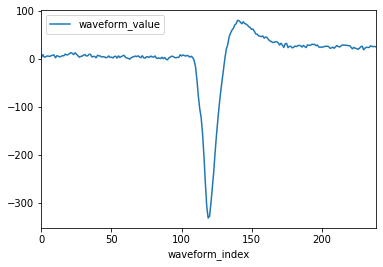

In [69]:
df = res[res['neuron_id']==neuron_ids[neuron_to_play_idx]]
df.plot(x="waveform_index", y="waveform_value")

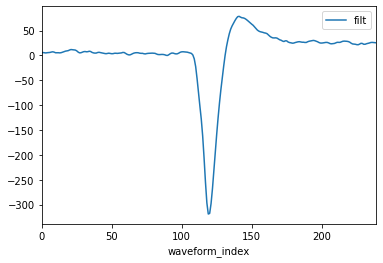

In [90]:
(
    df
    .sort_values(by=["waveform_index"])
    .pipe(lambda x: x.assign(filt=gaussian_filter1d(x["waveform_value"], sigma=1)))
    .plot(x="waveform_index", y="filt")
)

In [101]:
(
    df
    .sort_values(by=["waveform_index"])
    .pipe(lambda x: x.assign(filt=gaussian_filter1d(x["waveform_value"], sigma=1)))
    .pipe(lambda x: get_points(x))
)

ValueError: Can only compare identically-labeled Series objects

In [100]:


def get_points(df, value_col="filt", index_col="waveform_index", range_around=100):
    min_ = df[df[value_col] == df[value_col].min()][index_col]
    
    before_val = df[(df[index_col] > (min_ - range_around)) & (df[index_col] < min_)][index_col].max()
    before_idx =  df[df[index_col] == before_val][index_col]
    return pd.Series({"min": min_, "before": before_idx})

In [97]:
value_col="filt"
index_col="waveform_index"
range_around=100
min_=125

df[(df[index_col] > min_ - range_around) & (df[index_col] < min_)][index_col].max()

124.0